## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [3]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [50]:
# your code here
data = pd.read_csv("https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv")
data.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [51]:
data.tail(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [52]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [53]:
for column in data.columns:
    print(column+", number of NA =", data.isna()[column].sum())
# пропусков нет

status, number of NA = 0
duration, number of NA = 0
credit_history, number of NA = 0
purpose, number of NA = 0
amount, number of NA = 0
savings, number of NA = 0
employment_duration, number of NA = 0
installment_rate, number of NA = 0
personal_status_sex, number of NA = 0
other_debtors, number of NA = 0
present_residence, number of NA = 0
property, number of NA = 0
age, number of NA = 0
other_installment_plans, number of NA = 0
housing, number of NA = 0
number_credits, number of NA = 0
job, number of NA = 0
people_liable, number of NA = 0
telephone, number of NA = 0
foreign_worker, number of NA = 0
credit_risk, number of NA = 0


In [54]:
data['credit_risk'].value_counts() # cделала так для каждого столбца, чтобы понять тип признака

good    700
bad     300
Name: credit_risk, dtype: int64

In [55]:
data.dtypes

status                     object
duration                    int64
credit_history             object
purpose                    object
amount                      int64
savings                    object
employment_duration        object
installment_rate           object
personal_status_sex        object
other_debtors              object
present_residence          object
property                   object
age                         int64
other_installment_plans    object
housing                    object
number_credits             object
job                        object
people_liable              object
telephone                  object
foreign_worker             object
credit_risk                object
dtype: object

In [4]:
quant = ['duration', 'amount', 'age']
binary = ['people_liable', 'telephone', 'foreign_worker', 'credit_risk']
ordinal = ['status', 'savings', 'employment_duration', 'installment_rate', 'present_residence', 'number_credits', 'savings']
categogy = ['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job']

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [57]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [58]:
data[data.age > 60]['housing'].value_counts()

rent        30
own         12
for free     3
Name: housing, dtype: int64

In [59]:
print(round(data[(data.age < 30) & (data.housing=="rent")]['job'].count()/data[(data.age < 30)]['job'].count() * 100, 2), 'процентов моложе 30 лет снимает жилье')

66.67 процентов моложе 30 лет снимает жилье


In [60]:
print(round(data[(data.age > 60) & (data.housing=="rent")]['job'].count()/data[(data.age > 60)]['job'].count() * 100, 2), 'процентов старше 60 лет снимает жилье')

66.67 процентов старше 60 лет снимает жилье


Выглядит подозрительно - проверяю другим способом:

In [61]:
data[data.age < 30]['housing'].value_counts()

rent        246
for free    113
own          10
Name: housing, dtype: int64

In [62]:
data[data.age > 60]['housing'].value_counts()

rent        30
own         12
for free     3
Name: housing, dtype: int64

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [63]:
data.number_credits.value_counts() # смотрим, какие есть значения в столбце

1       633
2-3     333
4-5      28
>= 6      6
Name: number_credits, dtype: int64

In [64]:
print('Иностранцев с более чем тремя кредитами:', data[(data.foreign_worker == "yes") & ((data.number_credits == '>= 6') | (data.number_credits == '4-5') )]['job'].count())

Иностранцев с более чем тремя кредитами: 1


### Задание 6 (1 балл)

In [92]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

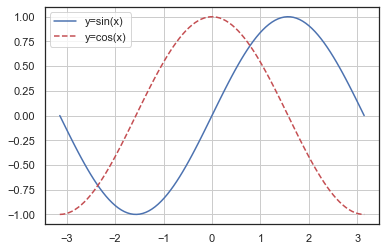

In [66]:
x = np.linspace(-np.pi, np.pi, 100)
plt.plot(x, np.sin(x), 'b', label = 'y=sin(x)')
plt.plot(x, np.cos(x), 'r--', label = 'y=cos(x)')
plt.axis('tight')
plt.legend()
plt.grid(True)
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [67]:
status_countg = pd.DataFrame(data[data['credit_risk'] == "good"].status.value_counts())
status_countb = pd.DataFrame(data[data['credit_risk'] == "bad"].status.value_counts())
df = status_countb.join(status_countg, lsuffix='_good', rsuffix='_bad')
df.reset_index(inplace=True)
df

,index,status_good,status_bad
0,no checking account,135,139
1,... < 0 DM,105,164
2,... >= 200 DM / salary for at least 1 year,46,348
3,0<= ... < 200 DM,14,49


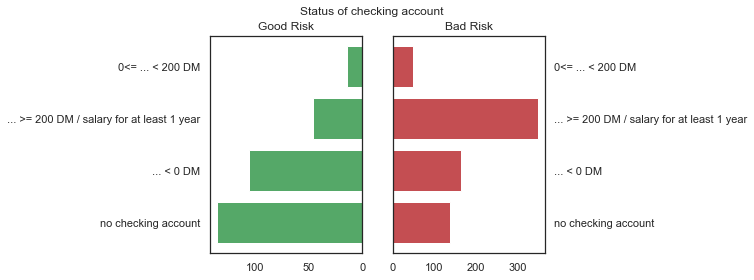

In [68]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.invert_xaxis()
ax1.barh(y = df['index'], width = df['status_good'], color ='g')
ax1.set_title('Good Risk')

ax2.barh(y = df['index'], width = df['status_bad'], color = 'r')
ax2.set_title('Bad Risk')

ax2.yaxis.set_tick_params(labelleft=False, labelright=True)

fig.suptitle('Status of checking account')
plt.show()

видно, что люди, со статусом "... >= 200 DM / salary for at least 1 year" в большей части случаев ненадежны

### Задание 8  (0.5 балла)

In [69]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

Seaborn гораздо проще по написанию кода, тут более красивые палитры цветов и градиенты. Но, мне кажется, в матплотлибе функционал обширнее, как и по механике построения графиков, так и по дизайну. 

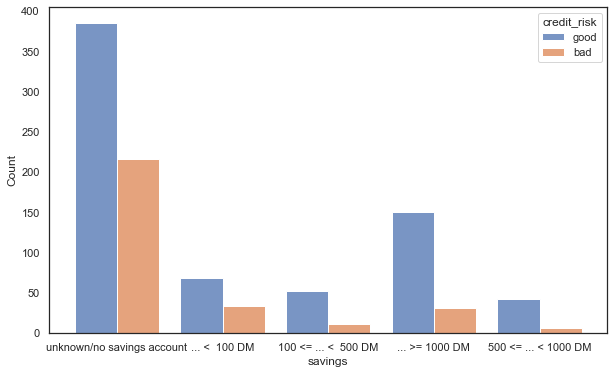

In [70]:
sns.set(style='white')
plt.rcParams['figure.figsize']=10,6
sns.histplot(data=data, x="savings", hue="credit_risk", multiple="dodge", shrink=.8)

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

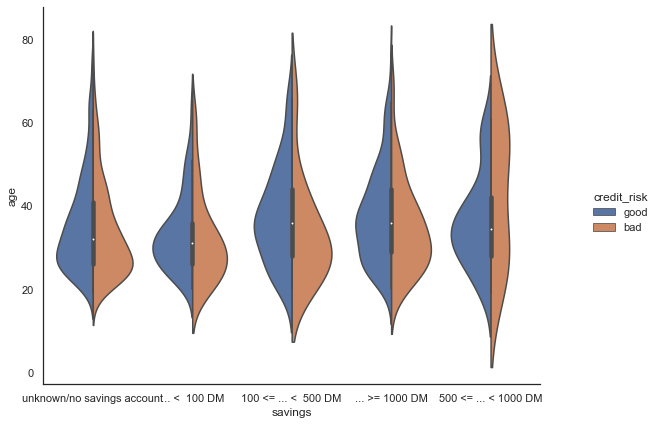

In [71]:
g = sns.catplot(x="savings", y="age", data=data, hue='credit_risk', kind="violin", split=True)
g.fig.set_size_inches(10,6)
plt.show()

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

In [72]:
gb = data.credit_risk.value_counts().index
gb

Index(['good', 'bad'], dtype='object')

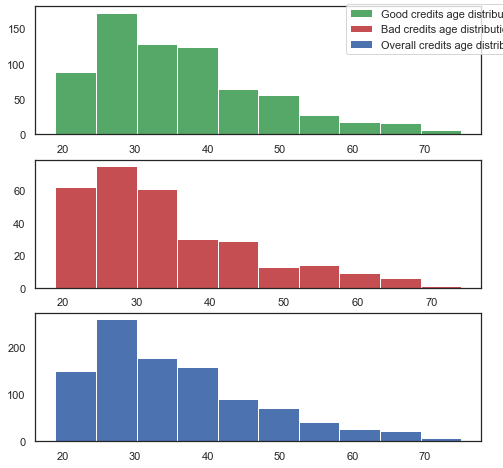

In [73]:
plt.rcParams['figure.figsize']=8,8
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)

ax1.hist(data[data['credit_risk'] == "good"]['age'], label = 'Good credits age distribution', color = 'g')
ax2.hist(data[data['credit_risk'] == "bad"]['age'], color = 'r', label = 'Bad credits age distribution')
ax3.hist(data['age'], color = 'b', label = 'Overall credits age distribution')

fig.legend(bbox_to_anchor=(0.6, 0.805), loc='upper left', borderaxespad=0.)
plt.show()

In [74]:
# your code here

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

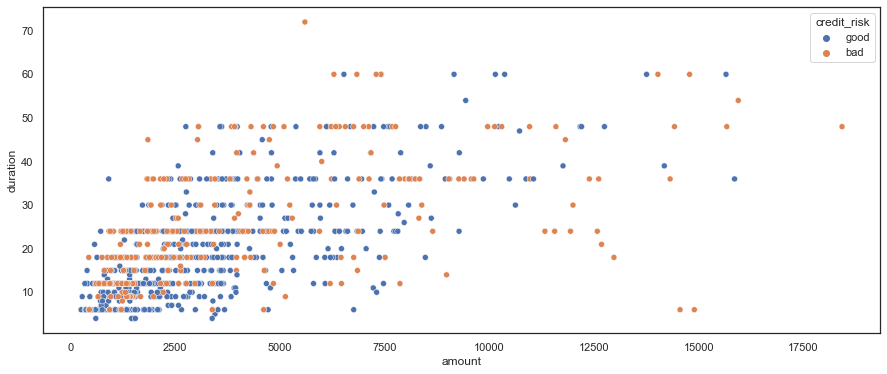

In [75]:
f, ax = plt.subplots(figsize=(15, 6))
sns.scatterplot(x="amount", y="duration", data=data, ax=ax, hue = 'credit_risk');

In [76]:
# your code here

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

In [77]:
data_bad = data[data['credit_risk'] == "bad"]
data_good = data[data['credit_risk'] == "good"]

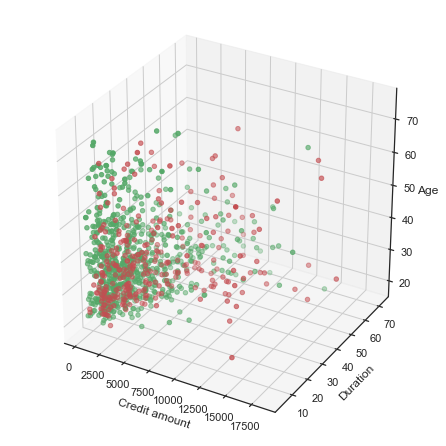

In [78]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

ax.scatter(data_bad['amount'], data_bad['duration'], data_bad['age'], color = 'r')
ax.scatter(data_good['amount'], data_good['duration'], data_good['age'], color = 'g')
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

plt.show()


In [79]:
# your code here

### Задание 13  (0.5 балла)

In [152]:
data = pd.read_csv("https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv")
data.head(3)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good


Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [153]:
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [154]:
ordinal + binary

['status',
 'savings',
 'employment_duration',
 'installment_rate',
 'present_residence',
 'number_credits',
 'savings',
 'people_liable',
 'telephone',
 'foreign_worker',
 'credit_risk']

In [155]:
list_of_dicts = []
ord_and_bin = ordinal + binary
for prisnak in ord_and_bin:
    all_values = data[prisnak].value_counts().index.tolist()
    list_of_dicts.append(dict(zip(all_values, [i for i in range(len(all_values))])))

In [156]:
for prisnak in ord_and_bin:
    data['{}_new'.format(prisnak)] = data[prisnak].apply(lambda x: list_of_dicts[ord_and_bin.index(prisnak)][x])
data.head(3)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,status_new,savings_new,employment_duration_new,installment_rate_new,present_residence_new,number_credits_new,people_liable_new,telephone_new,foreign_worker_new,credit_risk_new
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,1,0,3,0,0,0,0,0,0,0
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,1,0,0,1,1,1,1,0,0,0
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,2,2,2,1,0,0,0,0,0,0


In [157]:
data.drop(columns = ord_and_bin, inplace = True)
data.columns

Index(['duration', 'credit_history', 'purpose', 'amount',
       'personal_status_sex', 'other_debtors', 'property', 'age',
       'other_installment_plans', 'housing', 'job', 'status_new',
       'savings_new', 'employment_duration_new', 'installment_rate_new',
       'present_residence_new', 'number_credits_new', 'people_liable_new',
       'telephone_new', 'foreign_worker_new', 'credit_risk_new'],
      dtype='object')

In [158]:
categogy

['credit_history',
 'purpose',
 'personal_status_sex',
 'other_debtors',
 'property',
 'other_installment_plans',
 'housing',
 'job']

In [159]:
for prisnak in categogy:
    emb_dummies = pd.get_dummies(data[prisnak])
    data = pd.concat([data, emb_dummies], axis=1)
    data.drop(columns = prisnak, inplace=True)
data.shape

(1000, 49)

In [160]:
data.head()

,duration,amount,age,status_new,savings_new,employment_duration_new,installment_rate_new,present_residence_new,number_credits_new,people_liable_new,...,bank,none,stores,for free,own,rent,manager/self-empl./highly qualif. employee,skilled employee/official,unemployed/unskilled - non-resident,unskilled - resident
0,18,1049,21,1,0,3,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,9,2799,36,1,0,0,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0
2,12,841,23,2,2,2,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,12,2122,39,1,0,0,2,1,1,1,...,0,1,0,1,0,0,0,0,0,1
4,12,2171,38,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [161]:
data = data.astype('int64')

In [162]:
data['none'] # оказалось, есть два столбца с именем none

,none,none
0,1,1
1,1,1
2,1,1
3,1,1
4,1,0
...,...,...
995,1,1
996,0,1
997,1,1
998,1,1


In [163]:
data.drop(columns = "none", inplace=True) # не очень то они нам и нужны

In [164]:
data.isnull().mean() # еще раз проверим на наличие пустот

duration                                       0.0
amount                                         0.0
age                                            0.0
status_new                                     0.0
savings_new                                    0.0
employment_duration_new                        0.0
installment_rate_new                           0.0
present_residence_new                          0.0
number_credits_new                             0.0
people_liable_new                              0.0
telephone_new                                  0.0
foreign_worker_new                             0.0
credit_risk_new                                0.0
all credits at this bank paid back duly        0.0
critical account/other credits elsewhere       0.0
delay in paying off in the past                0.0
existing credits paid back duly till now       0.0
no credits taken/all credits paid back duly    0.0
business                                       0.0
car (new)                      

In [165]:
columns = data.columns.tolist()
columns.remove('credit_risk_new')

In [166]:
for column in columns:
    max1 = data[column].max()
    min1 = data[column].min()
    data['{}_n'.format(column)] = data[column].apply(lambda x: (x - min1) / (max1 - min1))

In [167]:
data.drop(columns = columns, inplace=True)

In [181]:
data.head(5) # нормализовали данные

,credit_risk_new,duration_n,amount_n,age_n,status_new_n,savings_new_n,employment_duration_new_n,installment_rate_new_n,present_residence_new_n,number_credits_new_n,...,unknown / no property_n,bank_n,stores_n,for free_n,own_n,rent_n,manager/self-empl./highly qualif. employee_n,skilled employee/official_n,unemployed/unskilled - non-resident_n,unskilled - resident_n
0,0,0.205882,0.043964,0.035714,0.333333,0.0,0.75,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,0.073529,0.140255,0.303571,0.333333,0.0,0.00,0.333333,0.333333,0.333333,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0.117647,0.032519,0.071429,0.666667,0.5,0.50,0.333333,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0.117647,0.103004,0.357143,0.333333,0.0,0.00,0.666667,0.333333,0.333333,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0.117647,0.105700,0.339286,0.333333,0.0,0.00,0.000000,0.000000,0.333333,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [208]:
data.columns

Index(['credit_risk_new', 'duration_n', 'amount_n', 'age_n', 'status_new_n',
       'savings_new_n', 'employment_duration_new_n', 'installment_rate_new_n',
       'present_residence_new_n', 'number_credits_new_n',
       'people_liable_new_n', 'telephone_new_n', 'foreign_worker_new_n',
       'all credits at this bank paid back duly_n',
       'critical account/other credits elsewhere_n',
       'delay in paying off in the past_n',
       'existing credits paid back duly till now_n',
       'no credits taken/all credits paid back duly_n', 'business_n',
       'car (new)_n', 'car (used)_n', 'domestic appliances_n',
       'furniture/equipment_n', 'others_n', 'radio/television_n', 'repairs_n',
       'retraining_n', 'vacation_n', 'female : non-single or male : single_n',
       'female : single_n', 'male : divorced/separated_n',
       'male : married/widowed_n', 'co-applicant_n', 'guarantor_n',
       'building soc. savings agr./life insurance_n', 'car or other_n',
       'real estate_n

In [321]:
def predict(X_test: np.array) -> np.array:
    
    bad_infl = X_test[[
        'amount_n', 'number_credits_new_n', 'unemployed/unskilled - non-resident_n',
        'unskilled - resident_n', 'delay in paying off in the past_n', 'business_n', 'status_new_n',
        'for free_n', 'stores_n', 'bank_n']]
    # исходя из статистики и графиков, подбираю параметры, влияющие в худшую или лучшую сторону
    good_infl = X_test[[
        'savings_new_n', 'employment_duration_new_n', 'people_liable_new_n', 'own_n',
        'manager/self-empl./highly qualif. employee_n', 'skilled employee/official_n',
        'all credits at this bank paid back duly_n', 'vacation_n', 'existing credits paid back duly till now_n',
        'radio/television_n', 'female : single_n', 'unknown / no property_n', 'car or other_n',
        'present_residence_new_n']]
    
    X_test['prediction'] = (good_infl.sum(axis=1).to_numpy()/14) - (bad_infl.sum(axis=1).to_numpy()/10)
    X_test['prediction_new'] = X_test['prediction'].apply(lambda s: 1 if s<0 else 0)
    return X_test['prediction_new']

In [322]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop('credit_risk_new', 1)
y = data['credit_risk_new']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

accuracy_score(y_test, predict(X_test))

C:\Users\Anna\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\Anna\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


0.7